In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
pd.DataFrame(customer_df)

,Age,Income ($),Gender,Spending ($),Customer Segment
0,41,114664,Female,2498.182322,Mid-Range
1,53,91389,Other,1183.926265,Budget
2,57,39435,Male,4939.573239,Budget
3,41,84340,Male,4725.890764,Budget
4,20,74078,Female,293.191376,Mid-Range
...,...,...,...,...,...
495,43,43234,Male,1962.958532,Mid-Range
496,33,83441,Female,2054.231626,Budget
497,68,30846,Female,2942.844609,Premium
498,54,40954,Male,2714.652479,Premium


In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Setting random seed for reproducibility
np.random.seed(42)

# Market Sizing Data
market_segments = ['Urban', 'Suburban', 'Rural', 'International']
market_growth_rate = np.random.uniform(0.05, 0.2, size=len(market_segments))  # Growth rates between 5% to 20%
market_size = np.random.randint(100000, 1000000, size=len(market_segments))  # Market size ranging from 100K to 1M

market_data = {
    'Market Segment': market_segments,
    'Market Size ($)': market_size,
    'Growth Rate (%)': market_growth_rate * 100,
}

# Customer Segmentation Data
customer_count = 500
customer_ages = np.random.randint(18, 70, size=customer_count)  # Age between 18 and 70
customer_incomes = np.random.randint(30000, 120000, size=customer_count)  # Income between 30K to 120K
customer_genders = np.random.choice(['Male', 'Female', 'Other'], size=customer_count)
customer_spending = np.random.uniform(100, 5000, size=customer_count)  # Spending behavior between 100 to 5000
customer_segments = np.random.choice(['Premium', 'Budget', 'Mid-Range'], size=customer_count)

# Create Customer DataFrame
customer_data = {
    'Age': customer_ages,
    'Income ($)': customer_incomes,
    'Gender': customer_genders,
    'Spending ($)': customer_spending,
    'Customer Segment': customer_segments
}

# Convert to DataFrames
market_df = pd.DataFrame(market_data)
customer_df = pd.DataFrame(customer_data)

# Display the generated data
print("Market Sizing Data:")
print(market_df.head(), '\n')

print("Customer Segmentation Data:")
print(customer_df.head(), '\n')

# Save to CSV (optional)
market_df.to_csv("market_sizing.csv", index=False)
customer_df.to_csv("c", index=False)



Market Sizing Data:
  Market Segment  Market Size ($)  Growth Rate (%)
0          Urban           154886        10.618102
1       Suburban           237337        19.260715
2          Rural           621430        15.979909
3  International           187498        13.979877 

Customer Segmentation Data:
   Age  Income ($)  Gender  Spending ($) Customer Segment
0   41      114664  Female   2498.182322        Mid-Range
1   53       91389   Other   1183.926265           Budget
2   57       39435    Male   4939.573239           Budget
3   41       84340    Male   4725.890764           Budget
4   20       74078  Female    293.191376        Mid-Range 



In [27]:
market_df.to_csv("market_sizing.csv", index=False)
customer_df.to_csv("c", index=False)

In [28]:
pd.DataFrame(customer_df)

,Age,Income ($),Gender,Spending ($),Customer Segment
0,41,114664,Female,2498.182322,Mid-Range
1,53,91389,Other,1183.926265,Budget
2,57,39435,Male,4939.573239,Budget
3,41,84340,Male,4725.890764,Budget
4,20,74078,Female,293.191376,Mid-Range
...,...,...,...,...,...
495,43,43234,Male,1962.958532,Mid-Range
496,33,83441,Female,2054.231626,Budget
497,68,30846,Female,2942.844609,Premium
498,54,40954,Male,2714.652479,Premium


In [29]:
market_df

,Market Segment,Market Size ($),Growth Rate (%)
0,Urban,154886,10.618102
1,Suburban,237337,19.260715
2,Rural,621430,15.979909
3,International,187498,13.979877


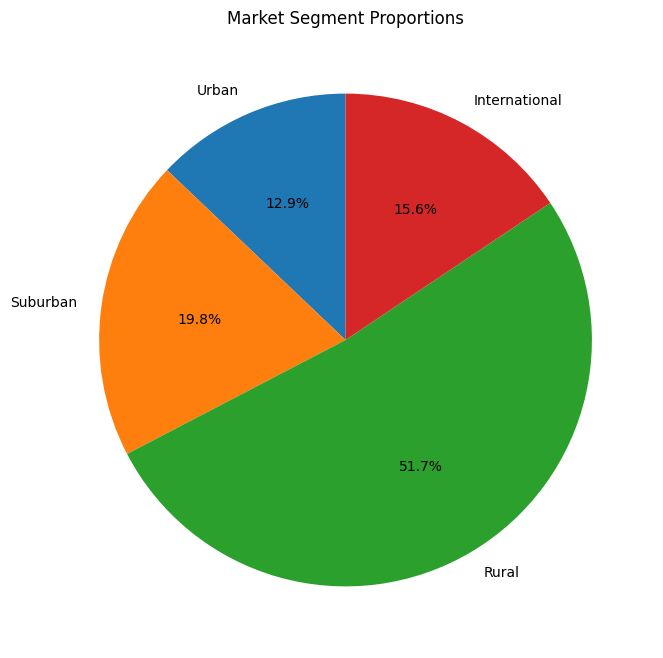

In [30]:
# @title Market Segment Proportions

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(market_df['Market Size ($)'], labels=market_df['Market Segment'], autopct='%1.1f%%', startangle=90)
_ = plt.title('Market Segment Proportions')

In [31]:
customer_df

,Age,Income ($),Gender,Spending ($),Customer Segment
0,41,114664,Female,2498.182322,Mid-Range
1,53,91389,Other,1183.926265,Budget
2,57,39435,Male,4939.573239,Budget
3,41,84340,Male,4725.890764,Budget
4,20,74078,Female,293.191376,Mid-Range
...,...,...,...,...,...
495,43,43234,Male,1962.958532,Mid-Range
496,33,83441,Female,2054.231626,Budget
497,68,30846,Female,2942.844609,Premium
498,54,40954,Male,2714.652479,Premium


   Age  Income ($)  Gender  Spending ($) Customer Segment
0   41      114664  Female   2498.182322        Mid-Range
1   53       91389   Other   1183.926265           Budget
2   57       39435    Male   4939.573239           Budget
3   41       84340    Male   4725.890764           Budget
4   20       74078  Female    293.191376        Mid-Range


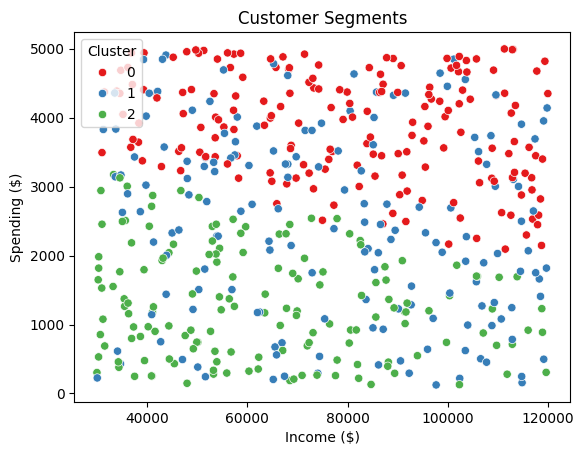

Cluster Centers:
[[ 0.49782065  0.22814487  0.86389551]
 [-1.14239643  0.11213876 -0.11189234]
 [ 0.62824453 -0.38904625 -0.90180934]]


In [32]:
# Load the dataset (replace with your actual dataset path)
data = pd.read_csv('c')
# Check the first few rows of the data to ensure it's loaded correctly
print(data.head())

# Select relevant features (e.g., Age, Income, Spending)
features = data[['Age', 'Income ($)', 'Spending ($)']]  # Use relevant columns

# Handle any missing values (optional)
features = features.dropna()  # or use features.fillna() for imputation

# Normalize the data (optional)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters (Income vs Spending)
sns.scatterplot(x=data['Income ($)'], y=data['Spending ($)'], hue=data['Cluster'], palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Income ($)')
plt.ylabel('Spending ($)')
plt.show()

# Display cluster centers (mean values of each feature per cluster)
print("Cluster Centers:")
print(kmeans.cluster_centers_)


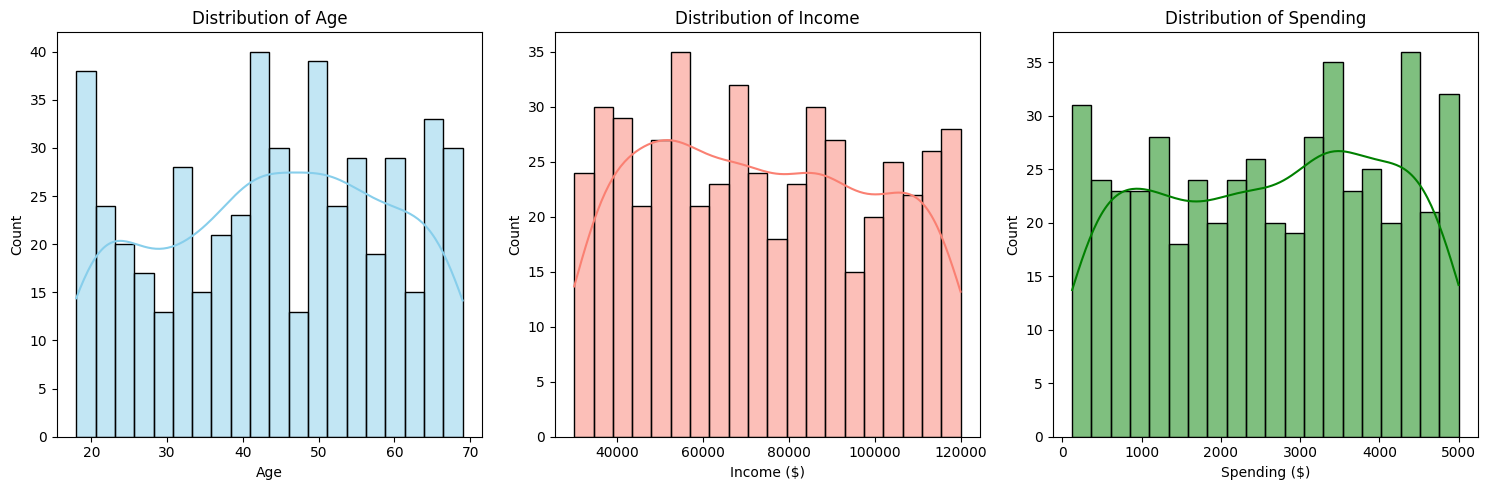

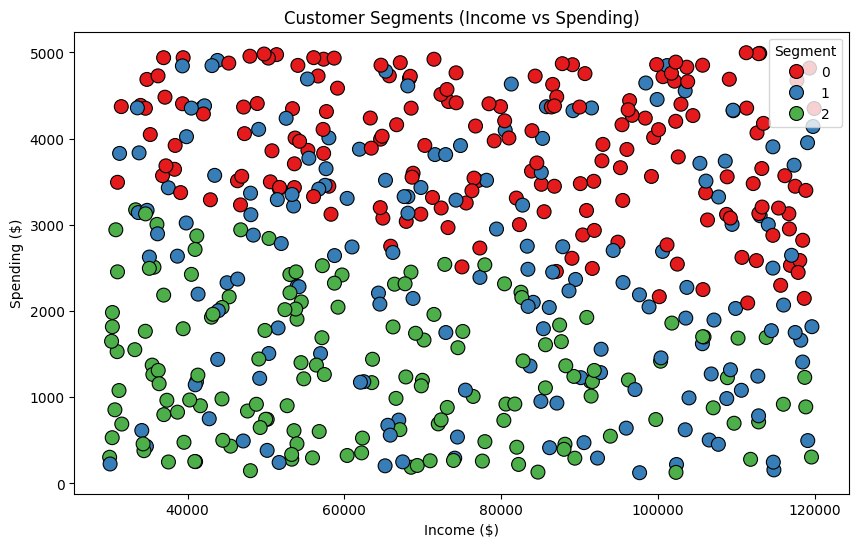

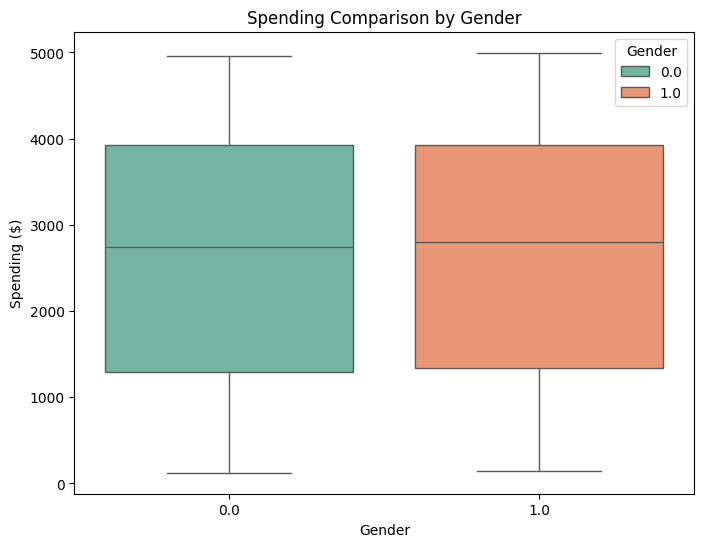

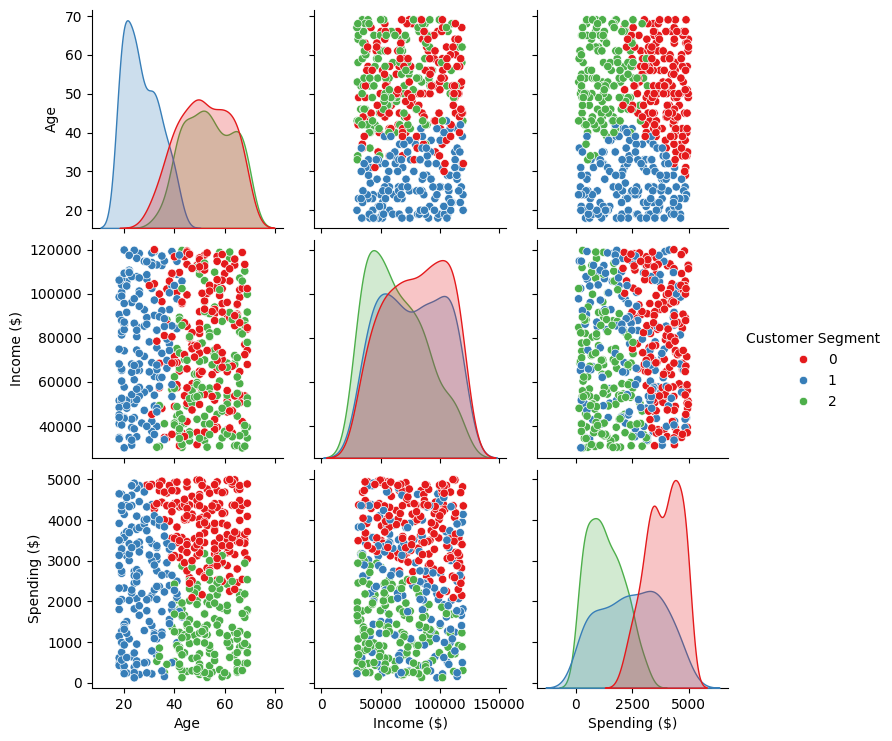

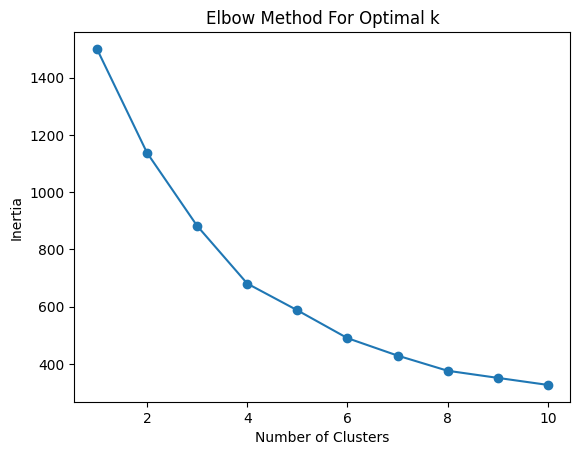

Cluster Centers (Age, Income, Spending):
[[ 0.67903249  1.10073152  0.85060815]
 [-1.35160638 -0.80464189 -0.91487881]
 [-0.86432895  0.97300563 -0.88090471]
 [ 1.29757473 -0.96025171 -1.04400697]
 [ 0.89957373  0.03633672  0.09014958]
 [-0.97998431  0.92132902  0.90056763]
 [-0.93893602 -0.73867257  0.85664361]
 [ 0.94539659  0.87335802 -0.97502756]
 [ 0.72048454 -0.89424357  0.93851132]
 [ 0.01139673 -0.92315385 -0.99943132]]


In [33]:
# Load the dataset (replace with actual file path)
data = pd.read_csv('c')

# Basic Cleaning and Feature Selection
# Selecting relevant columns for analysis
features = data[['Age', 'Income ($)', 'Spending ($)', 'Gender']]

# Encode Gender as numerical values (0: Female, 1: Male)
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['Age', 'Income ($)', 'Spending ($)']])

# KMeans clustering for customer segmentation (example: 3 segments)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Customer Segment'] = kmeans.fit_predict(scaled_features)

# 1. Visualizing Customer Distribution by Age, Income, and Spending
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for Age
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Age')

# Histogram for Income
sns.histplot(data['Income ($)'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Income')

# Histogram for Spending
sns.histplot(data['Spending ($)'], bins=20, kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribution of Spending')

plt.tight_layout()
plt.show()

# 2. Visualize Customer Segments by Age, Income, and Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income ($)', y='Spending ($)', hue='Customer Segment', palette='Set1', s=100, edgecolor='black')
plt.title('Customer Segments (Income vs Spending)')
plt.xlabel('Income ($)')
plt.ylabel('Spending ($)')
plt.legend(title='Segment')
plt.show()

# 3. Demographics Breakdown: Spending vs. Genderr
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending ($)', data=data, hue='Gender', palette='Set2', showfliers=False)
plt.title('Spending Comparison by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending ($)')
plt.legend(title='Gender', loc='upper right')
plt.show()


# 4. Pairplot: Feature Relationships across Segments
sns.pairplot(data[['Age', 'Income ($)', 'Spending ($)', 'Customer Segment']], hue='Customer Segment', palette='Set1')
plt.show()

# 5. Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Displaying the cluster centers
print("Cluster Centers (Age, Income, Spending):")
print(kmeans.cluster_centers_)


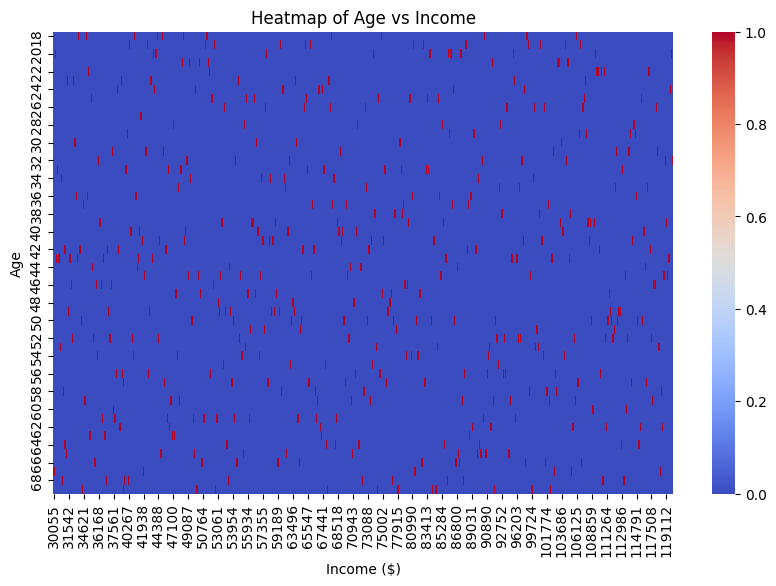

<ipython-input-34-4a144525c5f7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Income ($)', data=data, palette='Set2')


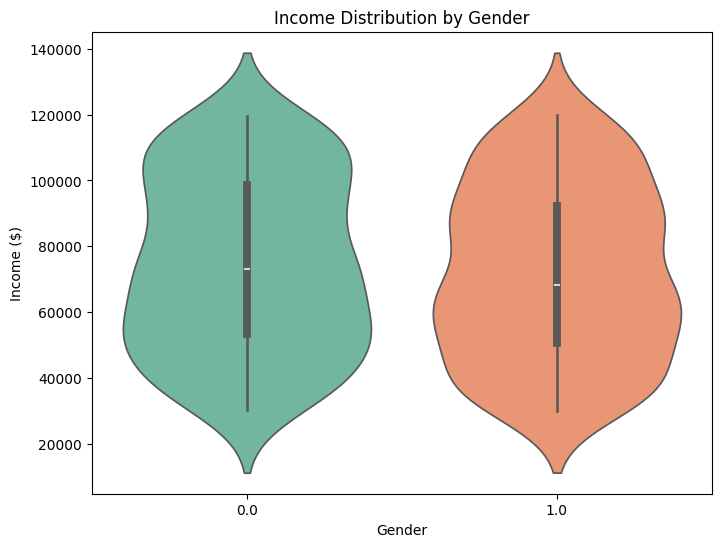

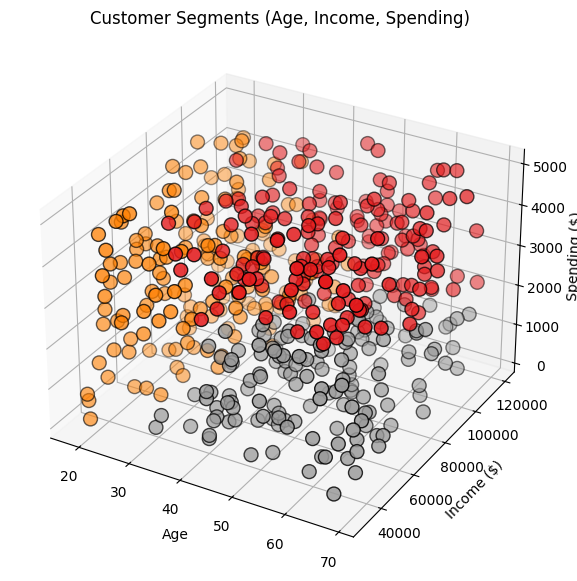

<ipython-input-34-4a144525c5f7>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Customer Segment', y='Spending ($)', data=data, palette='Set1')


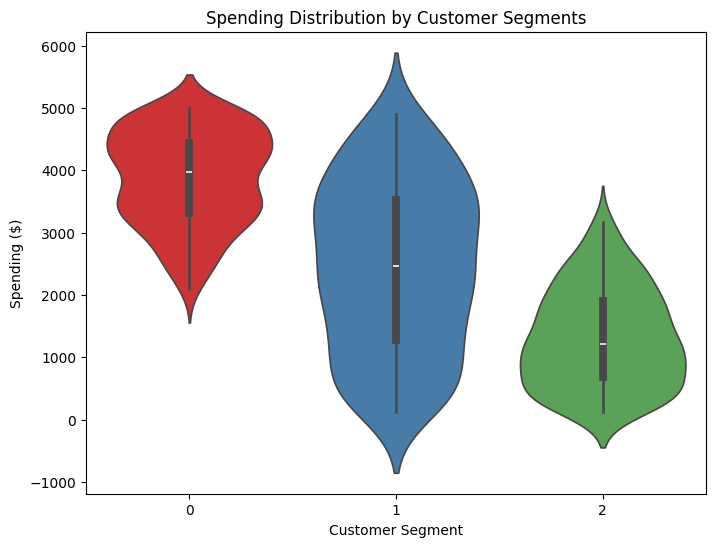

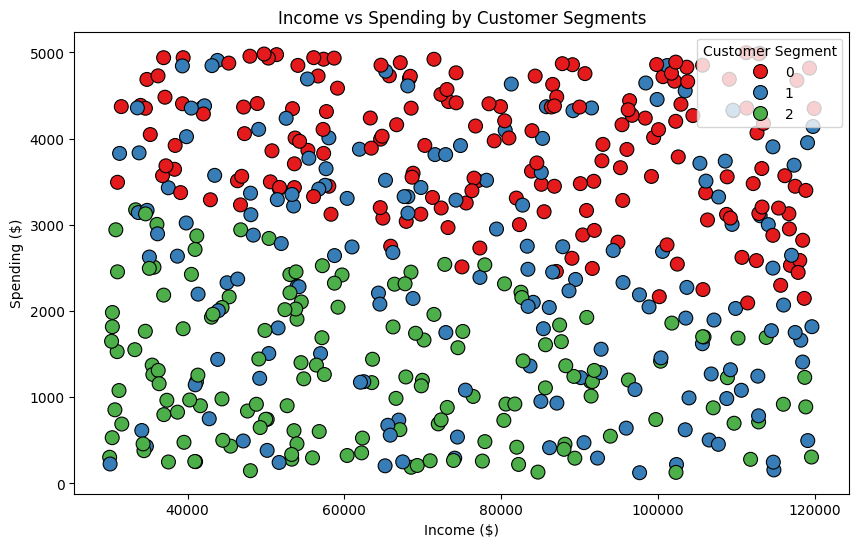

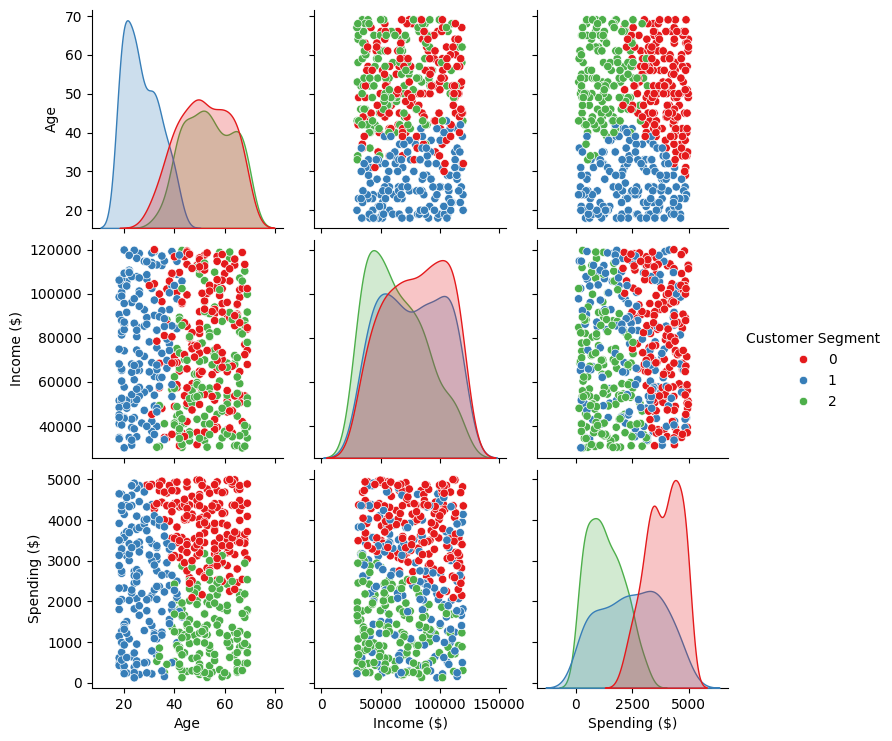

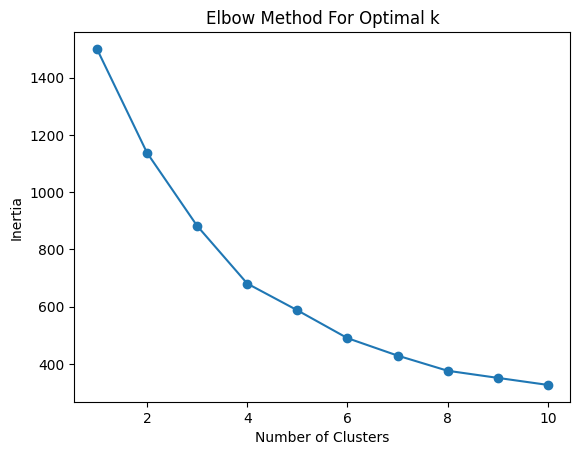

Cluster Centers (Age, Income, Spending):
[[ 0.67903249  1.10073152  0.85060815]
 [-1.35160638 -0.80464189 -0.91487881]
 [-0.86432895  0.97300563 -0.88090471]
 [ 1.29757473 -0.96025171 -1.04400697]
 [ 0.89957373  0.03633672  0.09014958]
 [-0.97998431  0.92132902  0.90056763]
 [-0.93893602 -0.73867257  0.85664361]
 [ 0.94539659  0.87335802 -0.97502756]
 [ 0.72048454 -0.89424357  0.93851132]
 [ 0.01139673 -0.92315385 -0.99943132]]


In [34]:
# Load the dataset (replace with actual file path)
data = pd.read_csv('c')

# Basic Cleaning and Feature Selection
# Selecting relevant columns for analysis
features = data[['Age', 'Income ($)', 'Spending ($)', 'Gender']]

# Encode Gender as numerical values (0: Female, 1: Male)
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['Age', 'Income ($)', 'Spending ($)']])

# KMeans clustering for customer segmentation (example: 3 segments)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Customer Segment'] = kmeans.fit_predict(scaled_features)

# 1. Heatmap: Age vs Income
plt.figure(figsize=(10, 6))
age_income_crosstab = pd.crosstab(data['Age'], data['Income ($)'])
sns.heatmap(age_income_crosstab, cmap='coolwarm', annot=False)
plt.title('Heatmap of Age vs Income')
plt.xlabel('Income ($)')
plt.ylabel('Age')
plt.show()


# 2. Income Distribution by Gender (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Income ($)', data=data, palette='Set2')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income ($)')
plt.show()

# 3. 3D Scatter Plot: Age, Income, Spending (Customer Segments)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D space
ax.scatter(data['Age'], data['Income ($)'], data['Spending ($)'], c=data['Customer Segment'], cmap='Set1', s=100, edgecolor='black')
ax.set_title('Customer Segments (Age, Income, Spending)')
ax.set_xlabel('Age')
ax.set_ylabel('Income ($)')
ax.set_zlabel('Spending ($)')
plt.show()

# 4. Customer Segments Distribution by Spending (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Customer Segment', y='Spending ($)', data=data, palette='Set1')
plt.title('Spending Distribution by Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Spending ($)')
plt.show()

# 5. Scatter Plot: Income vs Spending with Customer Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income ($)', y='Spending ($)', hue='Customer Segment', data=data, palette='Set1', s=100, edgecolor='black')
plt.title('Income vs Spending by Customer Segments')
plt.xlabel('Income ($)')
plt.ylabel('Spending ($)')
plt.show()

# 6. Pairplot: Customer Segments and Feature Relationships
sns.pairplot(data[['Age', 'Income ($)', 'Spending ($)', 'Customer Segment']], hue='Customer Segment', palette='Set1')
plt.show()

# Elbow Method to determine the optimal number of clusters (if not done yet)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Displaying the cluster centers
print("Cluster Centers (Age, Income, Spending):")
print(kmeans.cluster_centers_)


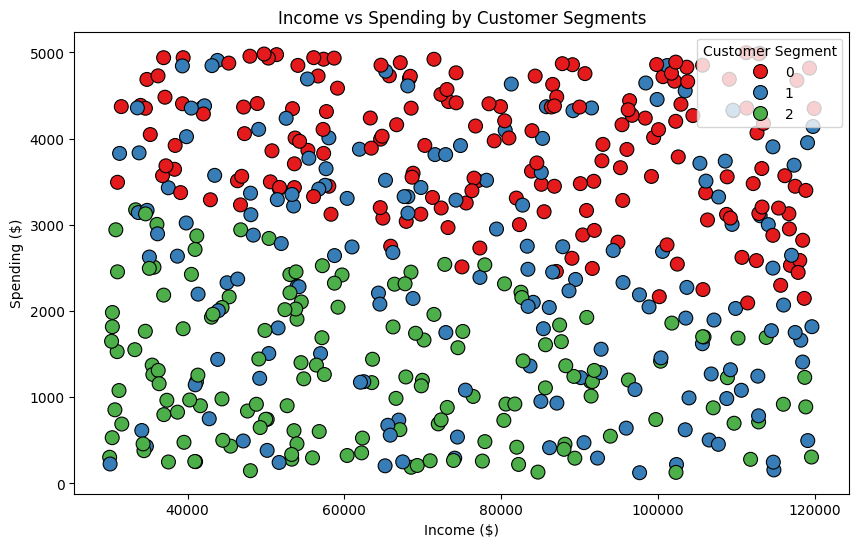

In [35]:
# Scatter plot: Spending vs Income with Customer Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income ($)', y='Spending ($)', hue='Customer Segment', data=data, palette='Set1', s=100, edgecolor='black')
plt.title('Income vs Spending by Customer Segments')
plt.xlabel('Income ($)')
plt.ylabel('Spending ($)')
plt.legend(title='Customer Segment')
plt.show()


<ipython-input-36-9881346f8d06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Spending ($)', data=data, palette='Set2')


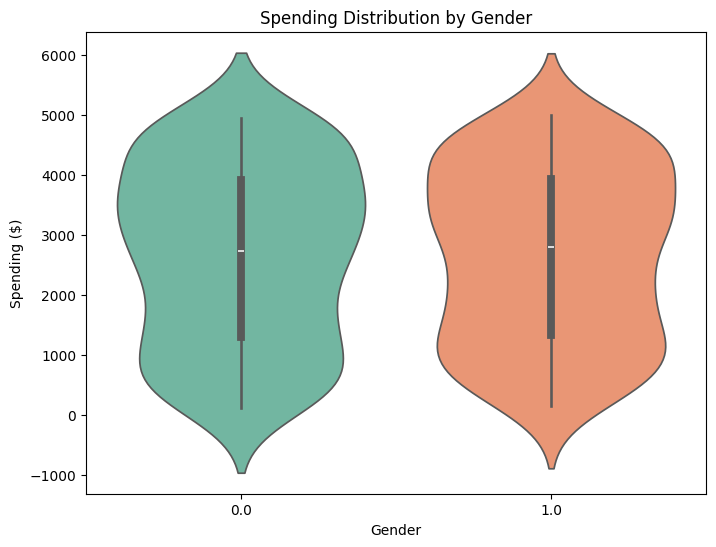

In [36]:
# Violin Plot: Spending Distribution by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Spending ($)', data=data, palette='Set2')
plt.title('Spending Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending ($)')
plt.show()

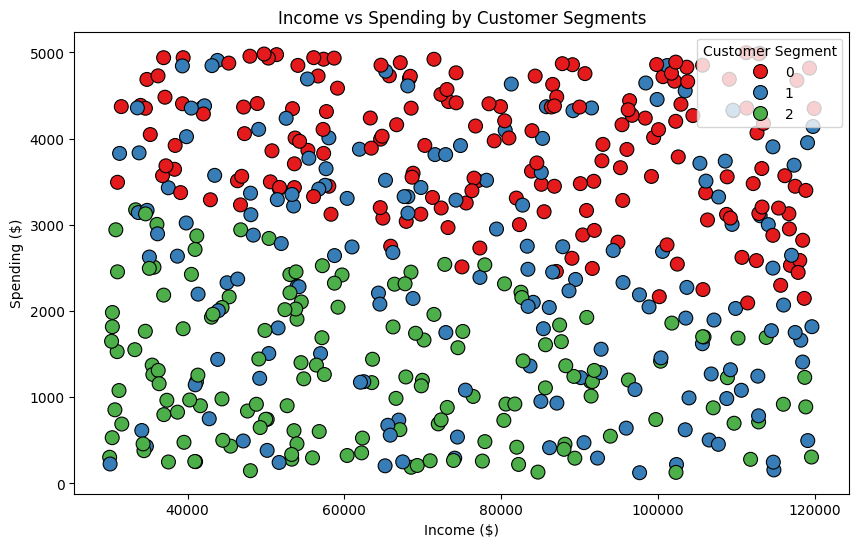

In [37]:
# Scatter plot: Income vs Spending with Customer Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income ($)', y='Spending ($)', hue='Customer Segment', data=data, palette='Set1', s=100, edgecolor='black')
plt.title('Income vs Spending by Customer Segments')
plt.xlabel('Income ($)')
plt.ylabel('Spending ($)')
plt.legend(title='Customer Segment')
plt.show()

*To effectively market our business, start by identifying our target audience through segmentation and creating customer personas. Optimize our value proposition by clearly communicating the unique benefits our products or services offer. Utilize digital marketing strategies, including content marketing, social media engagement, and SEO, to increase visibility and connect with customers. Enhance customer retention through personalized email campaigns and loyalty programs while regularly gathering feedback for continuous improvement. Lastly, monitor industry trends and adjust our strategies as needed to stay competitive and relevant in the market.*

<ipython-input-38-473635f74f5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Segment', y='Spending ($)', data=data, palette='Set2')


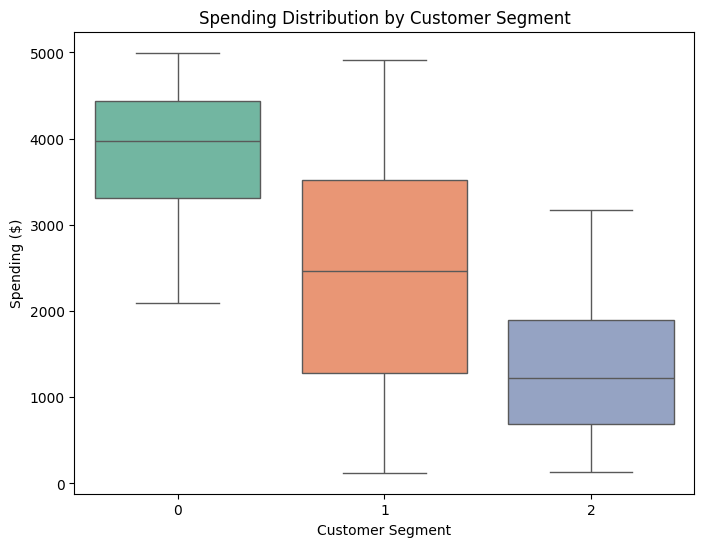

In [38]:
# Boxplot of Spending Across Customer Segments
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer Segment', y='Spending ($)', data=data, palette='Set2')
plt.title('Spending Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Spending ($)')
plt.show()

Marketing Insights:

Customer Segmentation (Scatter Plot & Boxplot): These tools give us a clearer picture of who our most valuable customers are. Think about it—those high-income individuals who are already spending a lot? Let’s focus on them and make them feel even more valued.

Age Group Spending Distribution (Boxplot): Different age groups have unique spending patterns. For example, younger customers might respond well to discounts or trendy products, while older customers might appreciate premium offers. We can use this to make our campaigns resonate on a personal level.

Gender-based Spending (Violin Plot): If there are noticeable differences in spending habits between genders, why not tailor campaigns to reflect that? Imagine crafting messages that feel directly relevant to each group—it’s a great way to boost engagement.

Income vs Spending (Scatter Plot): This one’s about understanding how spending grows with income. Those high-income, high-spending individuals? They’re perfect for premium product recommendations or exclusive offers. Let’s make them feel special.

Heatmap of Age vs Spending: This visualization helps us zero in on age groups that bring the most value. For instance, customers in their 30s and 40s often spend more—we could create campaigns that speak directly to their needs and preferences.

By using these visualizations, we’re not just analyzing data; we’re understanding people. These insights let us design campaigns that feel personal, effective, and impactful. Let me know if you’d like to dive deeper or explore specific ideas together!